In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv(r"D:\Kaggle_Work\Smoker_Status_Project\Smoker_Status_Project\Dataset\train.csv")

In [3]:
(train.isna().sum()/train.shape[0])*100

id                     0.0
age                    0.0
height(cm)             0.0
weight(kg)             0.0
waist(cm)              0.0
eyesight(left)         0.0
eyesight(right)        0.0
hearing(left)          0.0
hearing(right)         0.0
systolic               0.0
relaxation             0.0
fasting blood sugar    0.0
Cholesterol            0.0
triglyceride           0.0
HDL                    0.0
LDL                    0.0
hemoglobin             0.0
Urine protein          0.0
serum creatinine       0.0
AST                    0.0
ALT                    0.0
Gtp                    0.0
dental caries          0.0
smoking                0.0
dtype: float64

- No missing data so no need to do any data cleaning

#### BMI Calculation Function

In [4]:
def bmi_calc(data,weight_col,height_col):

    data['BMI'] = data.apply(lambda x: x[weight_col]/(x[height_col]/100)**2,axis=1)

    return data

In [5]:
bmi_calc(train,'weight(kg)','height(cm)')

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,75,16.5,1,1.0,22,25,27,0,1,22.038567
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,126,16.2,1,1.1,27,23,37,1,0,23.875115
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,93,17.4,1,0.8,27,31,53,0,1,25.951557
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,102,15.9,1,1.0,20,27,30,1,0,29.320988
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,93,15.4,1,0.8,19,13,17,0,1,22.038567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,159,14.5,1,0.8,25,26,13,0,0,18.730489
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,108,14.5,1,0.6,21,20,18,0,0,31.217482
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,93,10.9,1,0.6,15,9,12,0,0,19.531250
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,80,14.4,1,1.1,22,17,37,0,1,27.548209


#### Drop Columns Function

In [6]:
def drop_cols(data,cols:list):
    print("Earlier the columns were:",data.shape[1])
    data.drop(cols,axis=1,inplace=True)
    print("Now the columns are:",data.shape[1])

In [7]:
drop_cols(train,['id','weight(kg)','height(cm)'])

Earlier the columns were: 25
Now the columns are: 22


- dropping id weight and height 

In [8]:
drop_cols(train,['waist(cm)','HDL','LDL'])

Earlier the columns were: 22
Now the columns are: 19


In [9]:
train.head()

,age,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI
0,55,0.5,0.6,1,1,135,87,94,172,300,16.5,1,1.0,22,25,27,0,1,22.038567
1,70,0.6,0.7,2,2,146,83,147,194,55,16.2,1,1.1,27,23,37,1,0,23.875115
2,20,0.4,0.5,1,1,118,75,79,178,197,17.4,1,0.8,27,31,53,0,1,25.951557
3,35,1.5,1.2,1,1,131,88,91,180,203,15.9,1,1.0,20,27,30,1,0,29.320988
4,30,1.5,1.0,1,1,121,76,91,155,87,15.4,1,0.8,19,13,17,0,1,22.038567


In [10]:
train.columns

Index(['age', 'eyesight(left)', 'eyesight(right)', 'hearing(left)',
       'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'smoking',
       'BMI'],
      dtype='object')

In [11]:
y = train.pop('smoking')
X = train

In [12]:
X.head()

,age,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI
0,55,0.5,0.6,1,1,135,87,94,172,300,16.5,1,1.0,22,25,27,0,22.038567
1,70,0.6,0.7,2,2,146,83,147,194,55,16.2,1,1.1,27,23,37,1,23.875115
2,20,0.4,0.5,1,1,118,75,79,178,197,17.4,1,0.8,27,31,53,0,25.951557
3,35,1.5,1.2,1,1,131,88,91,180,203,15.9,1,1.0,20,27,30,1,29.320988
4,30,1.5,1.0,1,1,121,76,91,155,87,15.4,1,0.8,19,13,17,0,22.038567


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: smoking, dtype: int64

In [14]:
features_to_scale = ['age','eyesight(left)','eyesight(right)','hearing(left)','hearing(right)','systolic','relaxation','fasting blood sugar','Cholesterol', 'triglyceride', 'hemoglobin','Urine protein','serum creatinine', 'AST', 'ALT', 'Gtp','BMI']

#### Feature Scaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
# from sklearn.compose import ColumnTransformer


scaler = MinMaxScaler()

# preprocessor = ColumnTransformer(
#     [
#         ("MinMaxScaler", scaler, features_to_scale),        
#     ]
# )

In [16]:
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

In [17]:
X.describe()

,age,eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,0.373948,0.092428,0.091938,0.023974,0.023421,0.334586,0.369372,0.159126,0.375937,0.157805,0.614718,0.014847,0.080894,0.025281,0.008771,0.034319,0.197996,0.373796
std,0.182189,0.041032,0.040030,0.152969,0.151238,0.093598,0.101063,0.046595,0.089864,0.087321,0.088895,0.069571,0.018301,0.012260,0.006094,0.031299,0.398490,0.098883
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.307692,0.071429,0.071429,0.000000,0.000000,0.272059,0.292135,0.133739,0.310127,0.091029,0.552795,0.000000,0.071429,0.018135,0.005149,0.016048,0.000000,0.308319
50%,0.307692,0.091837,0.091837,0.000000,0.000000,0.323529,0.382022,0.151976,0.376582,0.141161,0.627329,0.000000,0.081633,0.023316,0.007209,0.025075,0.000000,0.367005
75%,0.538462,0.112245,0.112245,0.000000,0.000000,0.389706,0.426966,0.173252,0.443038,0.207124,0.677019,0.000000,0.091837,0.029793,0.010642,0.042126,0.000000,0.423889
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model 1

In [18]:
import statsmodels.api as sm

In [19]:
# Logistic regression model
logm1 = sm.GLM(y,(sm.add_constant(X)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                smoking   No. Observations:               159256
Model:                            GLM   Df Residuals:                   159237
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -80956.
Date:                Wed, 17 Apr 2024   Deviance:                   1.6191e+05
Time:                        21:33:28   Pearson chi2:                 1.50e+07
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2980
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -6.5801      0.071    -92.118      0.000      -6.720      -6.440
age                    -1.0311      0.039    -26.130      0.000      -1.108      -0.954
eyesight(left)          0.4976      0.166      2.996      0.003       0.172       0.823
eyesight(right)         1.1452      0.170      6.725      0.000       0.811       1.479
hearing(left)           0.0655      0.050      1.324      0.186      -0.031       0.163
hearing(right)          0.0725      0.050      1.442      0.149      -0.026       0.171
systolic               -1.3922      0.104    -13.441      0.000      -1.595      -1.189
relaxation              0.5702      0.094      6.076      0.000       0.386       0.754
fasting blood sugar     2.5176      0.142     17.748      0.000       2.240       2.796
Cholesterol            -3.6236      0.073    -49.459      0.000      -3.767      -3.480
triglyceride            6.2244      0.084     73.713      0.000       6.059       6.390
hemoglobin             10.0672      0.102     98.551      0.000       9.867      10.267
Urine protein          -0.5768      0.091     -6.324      0.000      -0.756      -0.398
serum creatinine        8.5714      0.383     22.353      0.000       7.820       9.323
AST                   -10.4006      0.787    -13.218      0.000     -11.943      -8.858
ALT                   -13.1464      1.834     -7.169      0.000     -16.740      -9.552
Gtp                    20.8595      0.312     66.934      0.000      20.249      21.470
dental caries           0.3822      0.015     25.162      0.000       0.352       0.412
BMI                    -1.6712      0.073    -22.840      0.000      -1.815      -1.528
=======================================================================================
"""

In [20]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [21]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=10)             # running RFE with 13 variables as output
rfe = rfe.fit(X, y)

In [22]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('age', False, 2),
 ('eyesight(left)', False, 6),
 ('eyesight(right)', True, 1),
 ('hearing(left)', False, 9),
 ('hearing(right)', False, 8),
 ('systolic', False, 3),
 ('relaxation', False, 5),
 ('fasting blood sugar', True, 1),
 ('Cholesterol', True, 1),
 ('triglyceride', True, 1),
 ('hemoglobin', True, 1),
 ('Urine protein', False, 4),
 ('serum creatinine', True, 1),
 ('AST', True, 1),
 ('ALT', True, 1),
 ('Gtp', True, 1),
 ('dental caries', False, 7),
 ('BMI', True, 1)]

In [23]:
col = X.columns[rfe.support_]

In [24]:
X.columns[~rfe.support_]

Index(['age', 'eyesight(left)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'Urine protein', 'dental caries'],
      dtype='object')

#### Model 2

In [25]:
X_train_sm = sm.add_constant(X[col])
logm2 = sm.GLM(y,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                smoking   No. Observations:               159256
Model:                            GLM   Df Residuals:                   159245
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -81923.
Date:                Wed, 17 Apr 2024   Deviance:                   1.6385e+05
Time:                        21:35:04   Pearson chi2:                 1.43e+07
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2895
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -7.2305      0.067   -107.860      0.000      -7.362      -7.099
eyesight(right)         2.4964      0.160     15.564      0.000       2.182       2.811
fasting blood sugar     1.3036      0.134      9.697      0.000       1.040       1.567
Cholesterol            -3.8554      0.072    -53.360      0.000      -3.997      -3.714
triglyceride            6.0530      0.083     72.631      0.000       5.890       6.216
hemoglobin             10.6906      0.099    108.490      0.000      10.497      10.884
serum creatinine        8.5947      0.380     22.608      0.000       7.850       9.340
AST                   -15.4723      0.763    -20.291      0.000     -16.967     -13.978
ALT                    -1.7646      1.687     -1.046      0.296      -5.072       1.542
Gtp                    20.4776      0.307     66.658      0.000      19.876      21.080
BMI                    -1.7555      0.071    -24.840      0.000      -1.894      -1.617
=======================================================================================
"""

In [26]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hemoglobin,50.35
5,serum creatinine,25.69
9,BMI,18.68
2,Cholesterol,15.70
1,fasting blood sugar,12.11
6,AST,8.54
0,eyesight(right),6.25
7,ALT,5.66
3,triglyceride,5.51
8,Gtp,2.79


#### Model 3

In [30]:
col = col.drop('ALT')

In [31]:
X_train_sm1 = sm.add_constant(X[col])
logm3 = sm.GLM(y,X_train_sm1, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                smoking   No. Observations:               159256
Model:                            GLM   Df Residuals:                   159246
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -81924.
Date:                Wed, 17 Apr 2024   Deviance:                   1.6385e+05
Time:                        21:37:58   Pearson chi2:                 1.40e+07
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2895
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -7.2143      0.065   -110.618      0.000      -7.342      -7.086
eyesight(right)         2.4859      0.160     15.539      0.000       2.172       2.799
fasting blood sugar     1.3050      0.134      9.708      0.000       1.042       1.568
Cholesterol            -3.8558      0.072    -53.365      0.000      -3.997      -3.714
triglyceride            6.0468      0.083     72.744      0.000       5.884       6.210
hemoglobin             10.6762      0.098    109.451      0.000      10.485      10.867
serum creatinine        8.6015      0.380     22.630      0.000       7.857       9.346
AST                   -15.9791      0.590    -27.083      0.000     -17.135     -14.823
Gtp                    20.4267      0.303     67.389      0.000      19.833      21.021
BMI                    -1.7743      0.068    -25.953      0.000      -1.908      -1.640
=======================================================================================
"""

In [32]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hemoglobin,50.33
5,serum creatinine,25.66
8,BMI,18.11
2,Cholesterol,15.54
1,fasting blood sugar,12.05
0,eyesight(right),6.25
6,AST,5.91
3,triglyceride,5.44
7,Gtp,2.71


#### Model 4

In [33]:
col = col.drop("hemoglobin")

In [34]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,serum creatinine,16.90
7,BMI,16.83
2,Cholesterol,14.24
1,fasting blood sugar,11.42
0,eyesight(right),5.90
5,AST,5.79
3,triglyceride,5.40
6,Gtp,2.71


In [35]:
col = col.drop("serum creatinine")

In [36]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,BMI,15.35
2,Cholesterol,13.26
1,fasting blood sugar,10.76
4,AST,5.67
0,eyesight(right),5.55
3,triglyceride,5.37
5,Gtp,2.71


In [37]:
col = col.drop("BMI")

In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Cholesterol,11.83
1,fasting blood sugar,9.47
4,AST,5.39
0,eyesight(right),5.32
3,triglyceride,5.05
5,Gtp,2.70


In [39]:
col = col.drop("Cholesterol")

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,fasting blood sugar,7.24
3,AST,4.99
0,eyesight(right),4.79
2,triglyceride,4.60
4,Gtp,2.70


In [41]:
col = col.drop("fasting blood sugar")

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,AST,4.28
0,eyesight(right),3.95
1,triglyceride,3.90
3,Gtp,2.69


In [43]:
X_train_sm2 = sm.add_constant(X[col])
logm4 = sm.GLM(y,X_train_sm2, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                smoking   No. Observations:               159256
Model:                            GLM   Df Residuals:                   159251
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -93643.
Date:                Wed, 17 Apr 2024   Deviance:                   1.8729e+05
Time:                        21:43:02   Pearson chi2:                 7.97e+09
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1768
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.4061      0.024   -100.833      0.000      -2.453      -2.359
eyesight(right)     5.6963      0.177     32.235      0.000       5.350       6.043
triglyceride        6.4092      0.072     88.549      0.000       6.267       6.551
AST               -11.0506      0.549    -20.128      0.000     -12.127      -9.975
Gtp                26.8079      0.299     89.761      0.000      26.223      27.393
===================================================================================
"""

In [44]:
y_train_pred = res.predict(X_train_sm2).values.reshape(-1)

In [47]:
y_train_pred_final = pd.DataFrame({'Actual_Smoking':y.values, 'SmokingProb':y_train_pred})
y_train_pred_final['Row_No'] = y.index
y_train_pred_final.head()

,Actual_Smoking,SmokingProb,Row_No
0,1,0.689258,0
1,0,0.265127,1
2,1,0.621318,2
3,0,0.606952,3
4,1,0.269374,4


In [48]:
y_train_pred_final['predicted'] = y_train_pred_final.SmokingProb.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Actual_Smoking,SmokingProb,Row_No,predicted
0,1,0.689258,0,1
1,0,0.265127,1,0
2,1,0.621318,2,1
3,0,0.606952,3,1
4,1,0.269374,4,0


In [49]:
from sklearn import metrics

In [50]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Actual_Smoking, y_train_pred_final.predicted )
print(confusion)

[[72539 17064]
 [31086 38567]]


In [51]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Actual_Smoking, y_train_pred_final.predicted))

0.6976566032049027


In [52]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [53]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5537019223866883

In [54]:
# Let us calculate specificity
TN / float(TN+FP)

0.8095599477696059

In [55]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19044005223039406


In [56]:
# positive predictive value 
print (TP / float(TP+FP))

0.6932645467455196


In [57]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7000144752714114


#### Function to draw roc

In [58]:
import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [59]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Actual_Smoking, y_train_pred_final.SmokingProb, drop_intermediate = False )

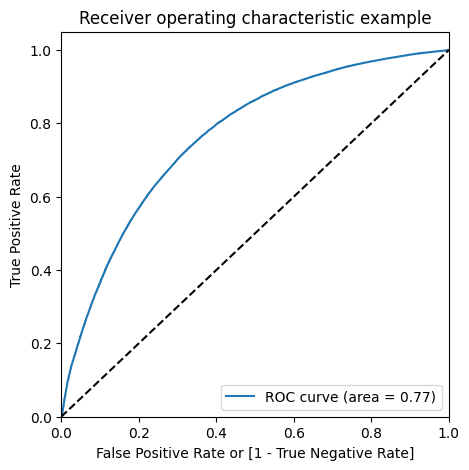

In [60]:
draw_roc(y_train_pred_final.Actual_Smoking, y_train_pred_final.SmokingProb)

In [61]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.SmokingProb.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Smoking,SmokingProb,Row_No,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.689258,0,1,1,1,1,1,1,1,1,0,0,0
1,0,0.265127,1,0,1,1,1,0,0,0,0,0,0,0
2,1,0.621318,2,1,1,1,1,1,1,1,1,0,0,0
3,0,0.606952,3,1,1,1,1,1,1,1,1,0,0,0
4,1,0.269374,4,0,1,1,1,0,0,0,0,0,0,0


In [62]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Smoking, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.437365  1.000000  0.000000
0.1   0.1  0.437497  0.999799  0.000391
0.2   0.2  0.516634  0.977201  0.158611
0.3   0.3  0.658744  0.864040  0.499157
0.4   0.4  0.699622  0.718347  0.685066
0.5   0.5  0.697657  0.553702  0.809560
0.6   0.6  0.670593  0.385123  0.892504
0.7   0.7  0.635505  0.237434  0.944946
0.8   0.8  0.607129  0.133993  0.974923
0.9   0.9  0.582176  0.057600  0.989956


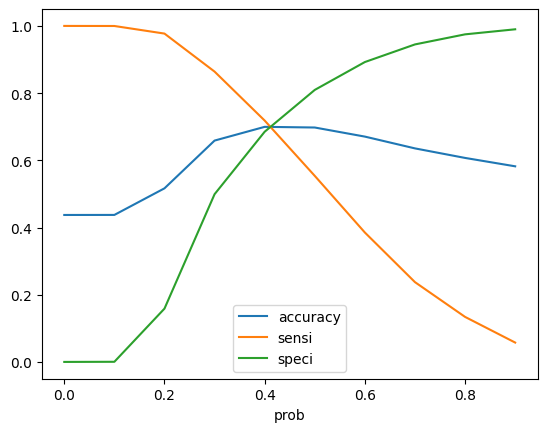

In [63]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [65]:
y_train_pred_final['final_predicted'] = y_train_pred_final.SmokingProb.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Actual_Smoking,SmokingProb,Row_No,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.689258,0,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.265127,1,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.621318,2,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.606952,3,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.269374,4,0,1,1,1,0,0,0,0,0,0,0,0


In [67]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Actual_Smoking, y_train_pred_final.final_predicted)

0.6996219922640278

In [68]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Actual_Smoking, y_train_pred_final.final_predicted )
confusion2

array([[61384, 28219],
       [19618, 50035]], dtype=int64)

In [70]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [71]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7183466613067635

In [72]:
# Let us calculate specificity
TN / float(TN+FP)

0.6850663482249478

In [73]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.31493365177505217


In [74]:
from sklearn.metrics import precision_score, recall_score

In [75]:
y_train_pred_final

,Actual_Smoking,SmokingProb,Row_No,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.689258,0,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.265127,1,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.621318,2,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.606952,3,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.269374,4,0,1,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,0,0.279246,159251,0,1,1,1,0,0,0,0,0,0,0,0
159252,0,0.493210,159252,0,1,1,1,1,1,0,0,0,0,0,1
159253,0,0.193081,159253,0,1,1,0,0,0,0,0,0,0,0,0
159254,1,0.503203,159254,1,1,1,1,1,1,1,0,0,0,0,1


In [76]:
precision_score(y_train_pred_final.Actual_Smoking, y_train_pred_final.final_predicted)

0.6393922355406753

In [77]:
recall_score(y_train_pred_final.Actual_Smoking, y_train_pred_final.final_predicted)

0.7183466613067635